In [54]:
from numpy import random
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

In [55]:
"""Game defination: agents a ring of all agents, Agents_actions stores the action of each agent, actions is list of actions"""
def game(agents, Agents_actions, alpha, actions):

    cov_num=0
    cov_time=0
    while cov_num<11:
        cov_time += 1
        player1 = random.choice(agents) #choose one agent randomly
        r = random.choice([0,1]) #choose one player1's neighbors randomly
        if r==1: 
            if player1==25:
                player2=0
            else:
                player2 = player1+1
        if r==0:
            if player1==0:player2=25
            else:player2=player1-1

        if Agents_actions[player1] != Agents_actions[player2]:
            r = random.random()
            if r<alpha: #player1, pick diff action at random
                else_acrions = np.delete(actions, Agents_actions[player1]) # other actions, (apart from player1's action)
                Agents_actions[player1] = random.choice(else_acrions)
                
            r = random.random()
            if r<alpha: #player1, pick diff action at random
                else_acrions = np.delete(actions, Agents_actions[player2]) # other actions, (apart from player2's action)
                Agents_actions[player2] = random.choice(else_acrions) 
                
        unique_actions = np.unique(Agents_actions)
        if len(unique_actions) == 1:
            cov_num += 1
        else:
            cov_num = 0
            
    return Agents_actions, cov_time

In [56]:
"""Experiment"""
agents = np.arange(26)
#actions list
actions = [0, 1]
#initial Agents_actions randomly
Agents_actions = np.zeros(26, dtype = int)
for i in range(26):
    Agents_actions[i] = random.choice(actions)

alpha_list = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]

res = game(agents, Agents_actions, alpha_list[3], actions)

print(res[1])

4377


In [88]:
"""Experiment function"""
def experiment(actions, trial_times):
    agents = np.arange(26)
    #initial Agents_actions randomly
    Agents_actions = np.zeros(26, dtype = int)

    alpha_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    cov_time_data = [[],[],[],[],[],[],[],[],[]] # store coverge time of each alpha, each trail
    cov_time_mean = [[],[],[],[],[],[],[],[],[]] # store average coverge time of each alpha, each trail
    cov_time_deviation = [[],[],[],[],[],[],[],[],[]] # store deviation coverge time of each alpha, each trail

    for i in range(9):
#         print(i)
        alpha = alpha_list[i]
        trial=0
        while trial<trial_times:
            for ite_action in range(26):
                Agents_actions[ite_action] = random.choice(actions)
            res = game(agents, Agents_actions, alpha, actions)
#             print(res[1])
            cov_time_data[i].append(res[1])
            trial+=1

    for i in range(9):
        cov_time_mean[i] = np.mean(cov_time_data[i])
        cov_time_deviation[i] = np.std(cov_time_data[i])

    print(cov_time_mean)
    print(cov_time_deviation)
    
    return cov_time_mean, cov_time_deviation

In [118]:
"""Experiment 2 actions"""
res_2actions = experiment([0,1], 200)

[9026.53, 4718.18, 3176.21, 2568.43, 2176.26, 2034.09, 1968.685, 2072.235, 3074.27]
[8430.801321885127, 4383.914225620752, 2882.3117485622543, 2386.2767494781488, 2162.090967651454, 2181.872389004453, 1656.946506612389, 1764.8595807528145, 2378.7924409456155]


In [93]:
"""Experiment 3 actions"""
res_3actions = experiment([0,1,2], 200)

[57972.43, 36002.63, 30667.645, 33131.08, 43033.67, 67851.83, 133643.74, 380694.675, 2056382.42]
[57159.06136585082, 34014.12379619825, 31259.676796777265, 33167.24916606139, 40862.61349242239, 71112.6938942767, 125338.24223445293, 374124.9692171179, 1786419.6210905863]


In [ ]:
#************************************************

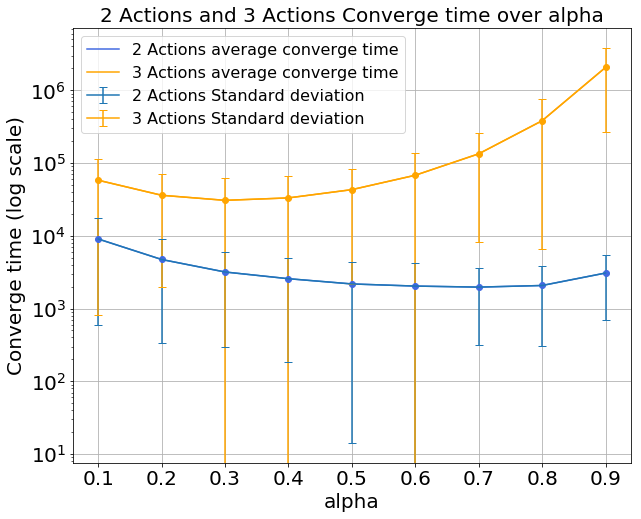

In [125]:
"""plot 2 actions"""
plt.figure(figsize=(10,8))

x_axis_2 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
y_axis_2 = res_2actions[0]
error_bar_2 = res_2actions[1]

plt.plot( x_axis_2, y_axis_2, color='royalblue', label = '2 Actions average converge time' )
plt.plot(x_axis_2, y_axis_2, 'o', color='royalblue') 
plt.errorbar(x_axis_2, y_axis_2, error_bar_2, capsize=4, label='2 Actions Standard deviation')

x_axis_3 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
y_axis_3 = res_3actions[0]
error_bar_3 = res_3actions[1]

plt.plot( x_axis_3, y_axis_3, color='orange', label = '3 Actions average converge time' )
plt.plot(x_axis_3, y_axis_3, 'o', color='orange') 
plt.errorbar(x_axis_3, y_axis_3, error_bar_3, capsize=4, color='orange', label='3 Actions Standard deviation')

plt.title('2 Actions and 3 Actions Converge time over alpha', fontsize=20)
plt.grid()
plt.xlabel('alpha', fontsize=20) 
plt.ylabel('Converge time (log scale)', fontsize=20) 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=16)
plt.yscale('log')
plt.show()